In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator
import os
import warnings
import random
import imageio
import glob
import scipy
import torch
from collections import defaultdict
import seaborn as sns
from sklearn import metrics
from skimage.transform import resize
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
random.seed(20)
warnings.filterwarnings("ignore")

### UKA Chest

In [3]:
df = pd.read_hdf('checkpoints/ukachest256_autoenc_cls/bootstrap_auc.h5')
df.head(10)

,pathology,roc-auc,y_pred,y_true,# positive,mean auc,CI lower,CI upper,bootstrap
0,Infiltrate_li,0.816177,"[0.044236712, 0.18774731, 0.09944609, 0.207404...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",139072.0,0.816118,0.815927,0.816310,"[0.8142702891837443, 0.81091137430123, 0.81829..."
1,Infiltrate_re,0.820671,"[0.108702734, 0.44924706, 0.25724915, 0.451912...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",174316.0,0.820866,0.820687,0.821045,"[0.8220575961068797, 0.8202710542043113, 0.819..."
2,Herzgröße,0.811781,"[0.8254117, 0.71751237, 0.4442513, 0.35424876,...","[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",329036.0,0.811677,0.811487,0.811867,"[0.8108688625001101, 0.8143621888692265, 0.807..."
3,Stauung,0.787729,"[0.3159104, 0.44280857, 0.38000152, 0.40055895...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",222517.0,0.787684,0.787476,0.787893,"[0.7841172504519897, 0.7869237309824957, 0.785..."
4,Pleuraerguss_re,0.862091,"[0.5055299, 0.22722842, 0.43626985, 0.3197922,...","[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",173732.0,0.862181,0.862024,0.862337,"[0.8587678699850176, 0.8589345809415188, 0.864..."
5,Pleuraerguss_li,0.839769,"[0.5371907, 0.38145557, 0.50560075, 0.37693158...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",215890.0,0.839793,0.839616,0.839969,"[0.8398040891802387, 0.8368040258946363, 0.843..."
6,Belstörungen_re,0.818135,"[0.77474624, 0.746425, 0.77244574, 0.8457879, ...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...",264225.0,0.818124,0.817931,0.818317,"[0.8209040125216966, 0.823769597389937, 0.8174..."
7,Belstörungen_li,0.810410,"[0.7549475, 0.7294662, 0.7648834, 0.7359911, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",272174.0,0.810529,0.810323,0.810735,"[0.81613251543664, 0.809668387227855, 0.810517..."


# padchest

In [2]:
df = pd.read_hdf('checkpoints/padchest256_autoenc_cls/bootstrap_auc.h5')

,pathology,roc-auc,y_pred,y_true,# positive,mean auc,CI lower,CI upper,bootstrap
0,total atelectasis,0.785741,"[6.9765105e-05, 0.00010307636, 4.9134156e-05, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,0.790237,0.781865,0.798609,"[0.980851599899219, 0.7954144620811288, 0.8170..."
1,reservoir central venous catheter,0.874196,"[0.0003684435, 0.00045467593, 0.07527442, 0.00...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14,0.874412,0.870982,0.877841,"[0.8765506807866867, 0.8475926192878767, 0.870..."
2,subacromial space narrowing,0.937717,"[0.00027693462, 1.9513544e-05, 0.00046990233, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,0.936461,0.933923,0.939000,"[0.9506172839506173, 0.972159234063996, 0.8934..."
3,surgery neck,0.945128,"[0.0012495856, 0.00019448684, 0.0013810747, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",27,0.945508,0.943487,0.947528,"[0.9081704046332647, 0.949100167139581, 0.9105..."
4,hilar congestion,0.885356,"[0.017687941, 0.027048074, 0.00951522, 0.03780...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",117,0.885727,0.884471,0.886983,"[0.8877782902184395, 0.897433936873012, 0.9180..."


(0.5964321685336761, 0.5917033433434323, 0.6011609937239198)

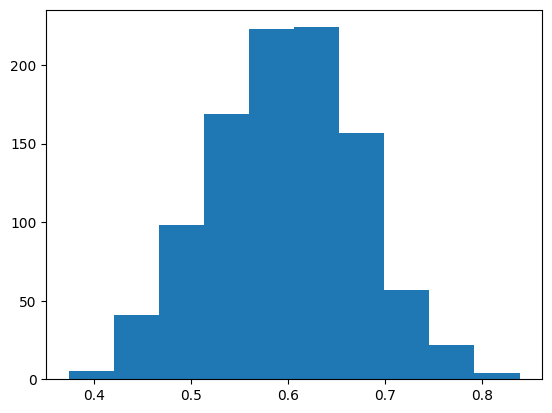

In [3]:
df.head()
n = 9

data = df[df['pathology'] == 'ground glass pattern']['bootstrap'].tolist()
_ = plt.hist(data)


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.asarray(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h
mean_confidence_interval(data[0])

In [4]:
df = df[df['# positive']>50]
d = defaultdict(list)
for n in range(len(df)):
    dfs = df.iloc[n]
    d[dfs['pathology'] + ' (n=%d)' % dfs['# positive']] = dfs['bootstrap']
df_plot = pd.DataFrame(d)
dfm = df_plot.melt(var_name='cols', value_name='vals')
df_plot.head()

,hilar congestion (n=117),suboptimal study (n=146),nsg tube (n=151),scoliosis (n=544),costophrenic angle blunting (n=345),volume loss (n=156),endotracheal tube (n=101),callus rib fracture (n=173),central venous catheter via subclavian vein (n=57),pseudonodule (n=145),...,fibrotic band (n=250),vertebral anterior compression (n=116),goiter (n=54),unchanged (n=822),hemidiaphragm elevation (n=149),infiltrates (n=253),alveolar pattern (n=271),hilar enlargement (n=91),cardiomegaly (n=739),hiatal hernia (n=115)
0,0.887778,0.808446,0.964131,0.762279,0.795002,0.763238,0.987319,0.783300,0.868131,0.573653,...,0.716841,0.770227,0.890709,0.634397,0.731947,0.731054,0.889849,0.713692,0.892638,0.869836
1,0.897434,0.866605,0.969676,0.758272,0.792822,0.781766,0.979493,0.742210,0.861184,0.676317,...,0.716518,0.785964,0.873490,0.645701,0.726474,0.701874,0.897198,0.685946,0.904264,0.900994
2,0.918097,0.803005,0.974965,0.747467,0.828066,0.785538,0.968625,0.729784,0.900437,0.627898,...,0.740397,0.742360,0.901592,0.651472,0.725445,0.739604,0.901506,0.703163,0.890085,0.893307
3,0.915299,0.831971,0.969143,0.745738,0.806568,0.814700,0.975083,0.751741,0.897556,0.635155,...,0.702437,0.821718,0.874050,0.632177,0.785693,0.706103,0.901876,0.657302,0.898115,0.892302
4,0.869953,0.850684,0.969325,0.740909,0.813365,0.798064,0.972870,0.759415,0.834737,0.640448,...,0.692993,0.742880,0.884299,0.638132,0.785866,0.735156,0.900104,0.659671,0.907830,0.878114


In [5]:
ranks = dfm.groupby("cols")["vals"].mean().fillna(0).sort_values()[::-1].index

In [6]:
colors = sns.color_palette('vlag', 73)

In [7]:
len(ranks)

53

[Text(0, 0.5, '')]

[Text(0.5, 0, 'AUROC')]

[(0.5, 1.0)]

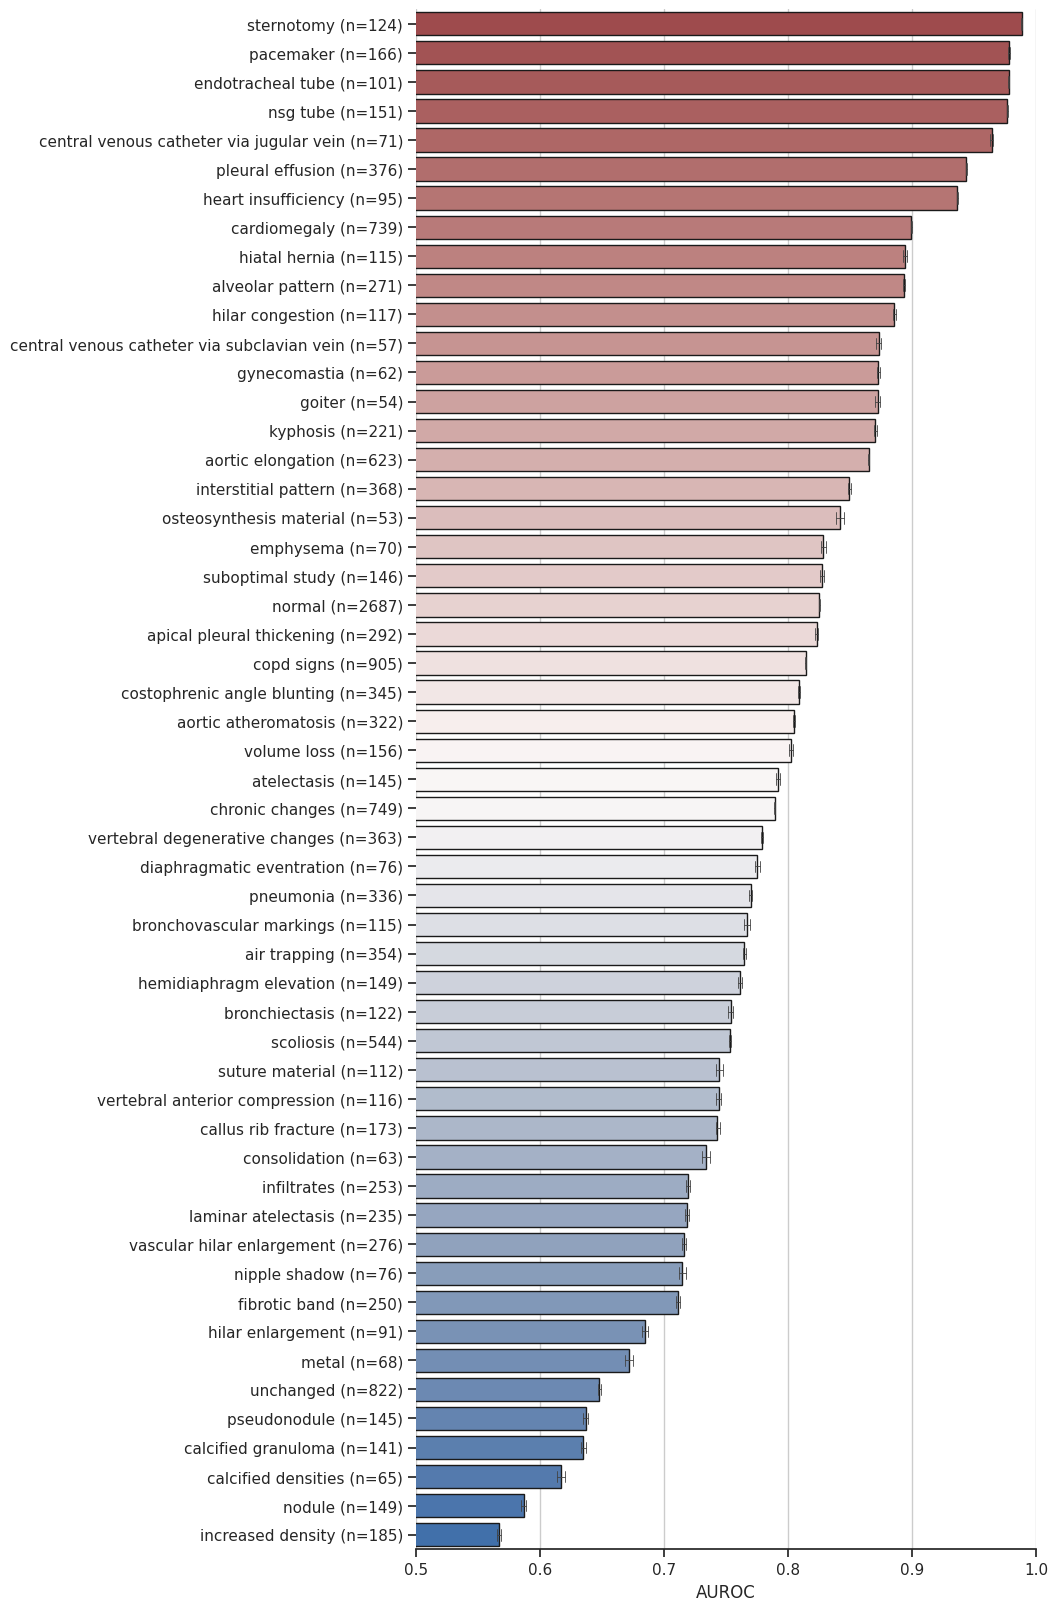

In [8]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(8, 20))
# dfm_ = dfm[dfm['cols'].isin(ranks[:len(ranks)//2])]
# g = sns.pointplot(y="cols", x="vals", data=dfm_, color='black', linestyles='', capsize=0,
#             order=ranks[:len(ranks)//2], scale=.6, ci=95, errwidth=1, markers='d')

g = sns.barplot(y="cols", x="vals", data=dfm, palette='vlag_r', capsize=.4,
            order=ranks, ci=95, alpha=1, errwidth=0.6, edgecolor=".1")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="AUROC")
g.set(xlim=(0.5, 1.0))
sns.despine(trim=True, left=True)

[Text(0, 0.5, '')]

[Text(0.5, 0, 'AUROC')]

[(0.4, 1.0)]

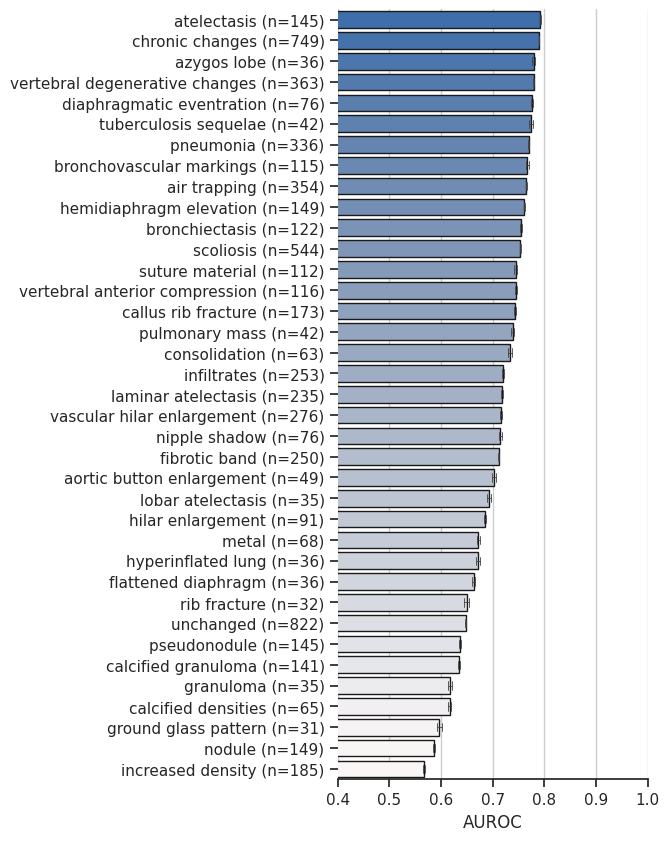

In [104]:
f, ax = plt.subplots(figsize=(4, 10))
dfm_ = dfm[dfm['cols'].isin(ranks[len(ranks)//2:])]
# g = sns.pointplot(y="cols", x="vals", data=dfm_, color='black', linestyles='', capsize=0,
#             order=ranks[len(ranks)//2:], scale=.6, ci=95, errwidth=1, markers='d')

g = sns.barplot(y="cols", x="vals", data=dfm_, palette=colors, capsize=.4,
            order=ranks[len(ranks)//2:], ci=95, alpha=1, errwidth=0.6, edgecolor='.1')

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="AUROC")
g.set(xlim=(0.4, 1.0))
sns.despine(trim=True, left=True)

# chexpert

In [34]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [98]:
df_chexpert = pd.read_hdf('checkpoints/chexpert256_autoenc_cls_subsample_1.0000/bootstrap_auc.h5')
df_chexpert.head()

,pathology,roc-auc,y_pred,y_true,# positive,mean auc,CI lower,CI upper,bootstrap
0,No Finding,0.914163,"[0.016918093, 0.026561743, 0.0023934757, 0.408...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",62,0.913681,0.912354,0.915009,"[0.9369696969696969, 0.9099099099099098, 0.938..."
1,Enlarged Cardiomediastinum,0.619177,"[0.13267545, 0.30975944, 0.083589464, 0.138216...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",253,0.619749,0.617579,0.621919,"[0.6196146213430638, 0.6422576718559806, 0.598..."
2,Cardiomegaly,0.761096,"[0.3134642, 0.012957537, 0.13151193, 0.1948446...","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",151,0.760533,0.758471,0.762595,"[0.7209737827715356, 0.7845322245322245, 0.769..."
3,Lung Opacity,0.894790,"[0.5572091, 0.7214234, 0.72002167, 0.23262659,...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",264,0.894408,0.893178,0.895638,"[0.901606811343704, 0.8689217758985202, 0.9172..."
4,Lung Lesion,0.759654,"[0.013833074, 0.0364031, 0.036942076, 0.012631...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...",8,0.761270,0.750779,0.771760,"[0.923076923076923, 0.45934959349593496, 0.423..."


In [60]:
d = defaultdict(list)

lens = []
for n in range(len(df_chexpert)):
    dfs = df_chexpert.iloc[n]
    lens.append(len(dfs['bootstrap']))
min(lens)
for n in range(len(df_chexpert)):
    dfs = df_chexpert.iloc[n]
    d[dfs['pathology']] = dfs['bootstrap'][:min(lens)]
df_plot = pd.DataFrame(d)

df_plot.head()

859

,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,0.698549,0.442922,0.612254,0.452193,0.190574,0.573929,0.701338,0.564024,0.409529,0.590164,0.769123,0.474044,0.373061,0.618408
1,0.669822,0.393559,0.682531,0.509923,0.298497,0.645765,0.583830,0.470558,0.456562,0.468496,0.667565,0.633065,0.759036,0.543060
2,0.703854,0.433788,0.664925,0.410867,0.418776,0.612866,0.791250,0.218496,0.376267,0.554435,0.773721,0.445344,0.579268,0.573526
3,0.744889,0.429180,0.593375,0.425107,0.425403,0.693196,0.684928,0.405644,0.391562,0.604675,0.707694,0.521341,0.585695,0.583762
4,0.669324,0.508069,0.643749,0.506887,0.408537,0.589334,0.634020,0.626122,0.417499,0.551957,0.703124,0.714859,0.697706,0.538954


In [46]:
len(df_chexpert)

14

In [151]:
d = defaultdict(list)

pathologies = ['No Finding', 'Lung Opacity', 'Edema', 'Consolidation', 
               'Pleural Effusion', 'Pleural Other', 'Fracture', 'Pneumonia']

files = sorted(glob.glob('checkpoints/chexpert256_autoenc_c*/bootstrap*'))[2:]
float(files[0].split('/')[-2].split('_')[-1])
for file in files:
    df = pd.read_hdf(file)
    lens = []
    for n in range(len(df)):
        dfs = df.iloc[n]
        lens.append(len(dfs['bootstrap']))
    d['subsample'] += [float(file.split('/')[-2].split('_')[-1])] * min(lens)
    for n in range(len(df)):
        dfs = df.iloc[n]
        if dfs['pathology'] in pathologies:
            d[dfs['pathology']] += dfs['bootstrap'][:min(lens)]

0.01

[(0.3, 1.0)]

[Text(0.5, 0, '% of training patients')]

[Text(0, 0.5, 'AUROC')]

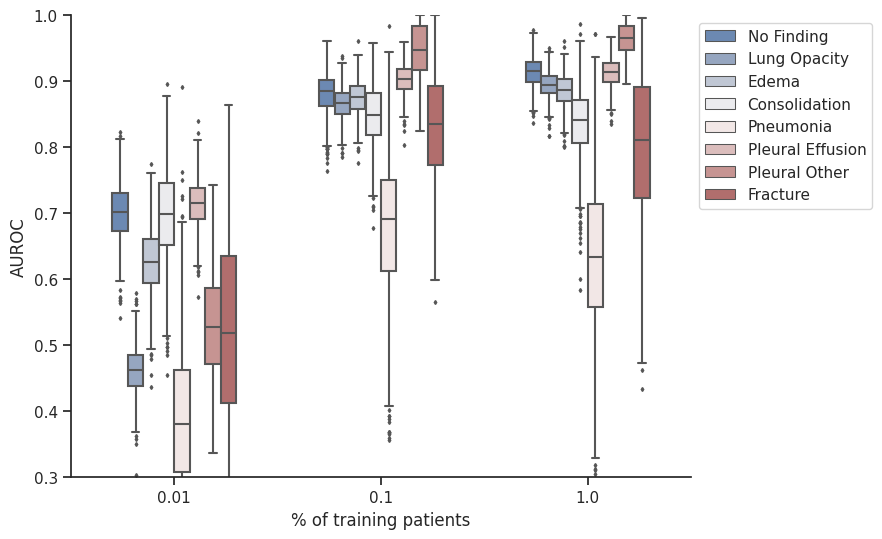

In [152]:
df_plot = pd.DataFrame(d)
df_long = pd.melt(df_plot, "subsample", var_name="", value_name="ROC-AUC")
# ranks = df_long.groupby("pathology")["ROC-AUC"].mean().fillna(0).sort_values()[::-1].index
f, ax = plt.subplots(figsize=(8, 6))
g = sns.boxplot(x="subsample", hue="", y="ROC-AUC", data=df_long, fliersize=2, width=.6, palette="vlag")
# 
g.set(ylim=(0.3, 1.0))
g.set(xlabel='% of training patients')
g.set(ylabel='AUROC')
sns.despine(right=True)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

In [80]:
df_plot.head()

,subsample,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,0.01,0.698549,0.442922,0.612254,0.452193,0.190574,0.573929,0.701338,0.564024,0.409529,0.590164,0.769123,0.474044,0.373061,0.618408
1,0.01,0.669822,0.393559,0.682531,0.509923,0.298497,0.645765,0.583830,0.470558,0.456562,0.468496,0.667565,0.633065,0.759036,0.543060
2,0.01,0.703854,0.433788,0.664925,0.410867,0.418776,0.612866,0.791250,0.218496,0.376267,0.554435,0.773721,0.445344,0.579268,0.573526
3,0.01,0.744889,0.429180,0.593375,0.425107,0.425403,0.693196,0.684928,0.405644,0.391562,0.604675,0.707694,0.521341,0.585695,0.583762
4,0.01,0.669324,0.508069,0.643749,0.506887,0.408537,0.589334,0.634020,0.626122,0.417499,0.551957,0.703124,0.714859,0.697706,0.538954


In [81]:
df_long.head()

,subsample,a,c
0,0.01,No Finding,0.698549
1,0.01,No Finding,0.669822
2,0.01,No Finding,0.703854
3,0.01,No Finding,0.744889
4,0.01,No Finding,0.669324
